Region (0,0):
[[200  10  30]
 [ 10 200  10]
 [ 10  10 110]]
* Kernel:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
= 1210

Region (0,1):
[[ 10  30  40]
 [200  10  10]
 [ 10 110 120]]
* Kernel:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
= -450

Region (1,0):
[[ 10 200  10]
 [ 10  10 110]
 [130 140 150]]
* Kernel:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
= -680

Region (1,1):
[[200  10  10]
 [ 10 110 120]
 [140 150 160]]
* Kernel:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
= 80



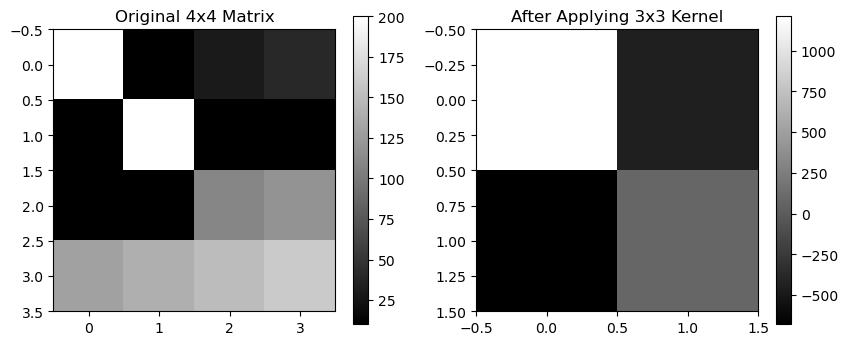

Region (0,0):
[[255   0   0]
 [255 255   0]
 [  0   0   0]]
* Kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
= 255

Region (0,1):
[[  0   0 255]
 [255   0   0]
 [  0   0   0]]
* Kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
= 0

Region (1,0):
[[255 255   0]
 [  0   0   0]
 [255 255   0]]
* Kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
= 0

Region (1,1):
[[255   0   0]
 [  0   0   0]
 [255   0 255]]
* Kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
= 0

Region (0,0):
[[  0   0 255]
 [  0   0 255]
 [  0   0 255]]
* Kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
= 0

Region (0,1):
[[  0 255   0]
 [  0 255 255]
 [  0 255 255]]
* Kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
= 255

Region (1,0):
[[  0   0 255]
 [  0   0 255]
 [255 255 255]]
* Kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
= 0

Region (1,1):
[[  0 255 255]
 [  0 255 255]
 [255 255 255]]
* Kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
= 255

Region (0,0):
[[ 76 150  29]
 [ 76  76  29]
 [150 150  29]]
* Kernel:
[[ 0 -1 -1]
 [-1  1  0]
 [ 0 -1  0]]
= -329

Region (0,1):
[[150  29 226]
 [ 76  29 179]
 [150  29  

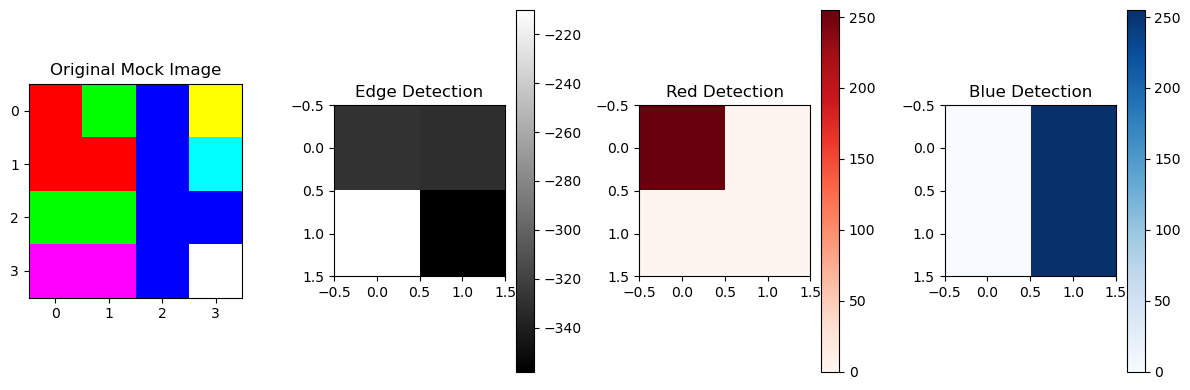

In [19]:
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import cv2  # OpenCV for image processing (offline use with mock or local image)

# ---------------------------- Step-by-step Convolution on Matrix ----------------------------

# Create a simple 4x4 matrix as input (grayscale image mockup)
input_matrix = np.array([
    [200, 10, 30, 40],
    [10, 200, 10, 10],
    [10, 10, 110, 120],
    [130, 140, 150, 160]
])

# Ein Pixel in der nähe von 0, wird als schwarz angezeigt. Ein Pixel in der nähe von 255, wird als weiß angezeigt.

# Define a simple 3x3 kernel (e.g., edge detection)
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Function to apply 3x3 convolution manually (valid padding)
def apply_convolution(matrix, kernel):
    """Applies a 3x3 kernel to a 2D matrix step by step."""
    m, n = matrix.shape
    km, kn = kernel.shape
    output = np.zeros((m - km + 1, n - kn + 1))  # Output dimensions after valid convolution

    # Slide the kernel over the matrix
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = matrix[i:i+km, j:j+kn]  # Extract the region of interest
            value = np.sum(region * kernel)  # Element-wise multiplication and sum
            output[i, j] = value  # Store result
            print(f"Region ({i},{j}):\n{region}\n* Kernel:\n{kernel}\n= {value}\n")
    return output

# Apply convolution to the sample matrix
output_matrix = apply_convolution(input_matrix, kernel)

# Visualize input and output
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(input_matrix, cmap='gray')
plt.title("Original 4x4 Matrix")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(output_matrix, cmap='gray')
plt.title("After Applying 3x3 Kernel")
plt.colorbar()
plt.show()

# ---------------------------- Convolution on an Image for Edge and Color Detection ----------------------------

# Define kernels
edge_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Red detection kernel (approximation, focus on R channel)
red_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

# Blue detection kernel (focus on B channel)
blue_kernel = red_kernel.copy()

# Mockup image as RGB array (4x4 pixels)
mock_image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0]],
    [[255, 0, 0], [255, 0, 0], [0, 0, 255], [0, 255, 255]],
    [[0, 255, 0], [0, 255, 0], [0, 0, 255], [0, 0, 255]],
    [[255, 0, 255], [255, 0, 255], [0, 0, 255], [255, 255, 255]]
], dtype=np.uint8)

# Function to apply kernel to a single channel
def convolve_channel(channel, kernel):
    return apply_convolution(channel, kernel)

# Extract channels
red_channel = mock_image[:, :, 0]
green_channel = mock_image[:, :, 1]
blue_channel = mock_image[:, :, 2]

# Apply red and blue detection
red_detected = convolve_channel(red_channel, red_kernel)
blue_detected = convolve_channel(blue_channel, blue_kernel)

# Apply edge detection to grayscale conversion of mock image
gray_image = cv2.cvtColor(mock_image, cv2.COLOR_RGB2GRAY)
edge_detected = apply_convolution(gray_image, edge_kernel)

# Visualization of image processing results
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(mock_image)
plt.title("Original Mock Image")

plt.subplot(1, 4, 2)
plt.imshow(edge_detected, cmap='gray')
plt.title("Edge Detection")
plt.colorbar()

plt.subplot(1, 4, 3)
plt.imshow(red_detected, cmap='Reds')
plt.title("Red Detection")
plt.colorbar()

plt.subplot(1, 4, 4)
plt.imshow(blue_detected, cmap='Blues')
plt.title("Blue Detection")
plt.colorbar()

plt.tight_layout()
plt.show()